In [0]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
import pandas as pd
idx = 0
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


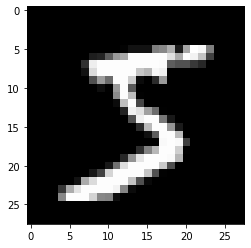

In [3]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[idx], cmap="gray")

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
l = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers=l)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 如果你最後只有輸出一個神經元: BinaryCrossentropy
#                 多個神經元: CategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [6]:
# 預處理
import numpy as np
from tensorflow.keras.utils import to_categorical
# a = np.array([1, 2, 3, 4, 5, 6])
# a.reshape(-1, 3)
# x: 0~1 -1~1: 配合tf的weights
# y: 正確機率: 3 -> [0 0 0 1 0 0 0 0 0 0]
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0], y_train_cat[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# batch_size: 問多少個人再做一次調整(圖片小:100~200, 圖片大: 5~50)
# epochs: 看完所有資料就叫一個epoch
# validation_split: 驗證資料決定你的模型什麼時候最好
# verbose: 2沒有進度條
c = [
     EarlyStopping(patience=5, restore_best_weights=True),
     # 手動儲存: model.save("mlp.h5")
     ModelCheckpoint("mlp.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train_cat,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=c)

In [8]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9759


[0.0759819895029068, 0.9758999943733215]

In [12]:
# predict: predict機率
# predict_classes: 類別
pre = model.predict_classes(x_test_norm)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [13]:
from sklearn.metrics import confusion_matrix
# in tensorflow: one-hot encoding
# not tensorflow: original
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             columns=["{}(預測)".format(i) for i in range(10)],
             index=["{}(真實)".format(i) for i in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),971,0,1,0,0,1,2,1,4,0
1(真實),0,1124,3,1,0,2,2,0,3,0
2(真實),5,2,1005,2,2,2,3,6,5,0
3(真實),0,0,4,984,1,5,0,6,6,4
4(真實),1,0,2,1,960,1,4,3,2,8
5(真實),2,0,0,7,1,872,5,1,3,1
6(真實),6,3,3,1,5,3,934,0,3,0
7(真實),1,6,8,4,1,0,0,997,2,9
8(真實),3,1,3,6,6,5,1,5,939,5
9(真實),3,5,0,10,9,1,0,7,1,973


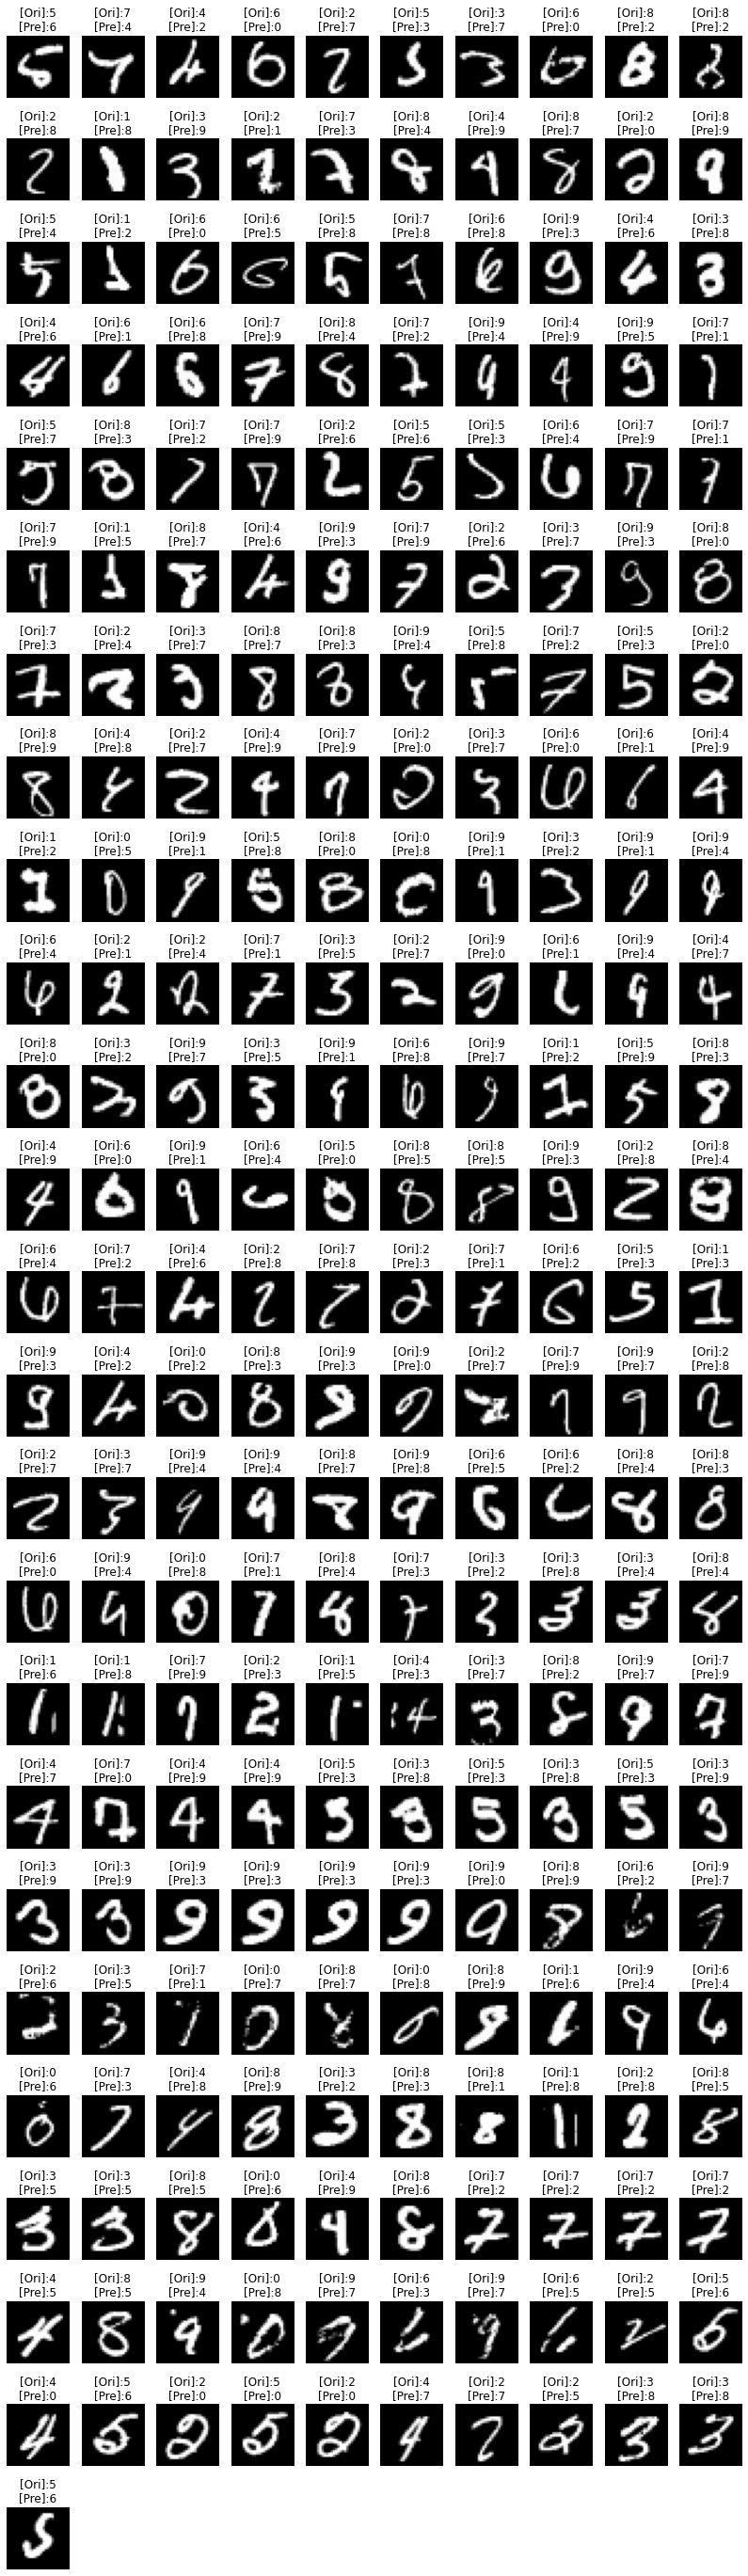

In [29]:
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 50))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[Ori]:{}\n[Pre]:{}".format(false_label[i], 
                                    false_pre[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

檔名:a.png
預測: 2


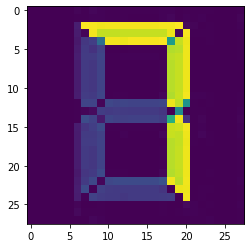

In [38]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名:")
# L: 灰階
img = load_img(f, target_size=(28, 28)).convert("L")
img_np = np.array(img)
x = img_np.reshape(1, 784) / 255
pre = model.predict_classes(x)[0]
print("預測:", pre)
plt.imshow(img_np)